<a href="https://colab.research.google.com/github/robinsonmirandaco/air-quality-regression-unir/blob/main/Laboratorio_Actividad_1_RobinsonMiranda_UNIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

_Estudiante: Robinson J. Miranda Pérez_


# Laboratorio: Regresión lineal y árboles de decisión para tareas de regresión


## Objetivos

Mediante esta actividad se pretende que ponga en práctica los pasos para la resolución de un problema de machine learning, el tratamiento de datos y la creación de modelos basados en regresión lineal y árboles de decisión. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Iniciarse en el Análisis Exploratorio de Datos (EDA) para los problemas de Machine Learning.
- Entender y aplicar los conceptos de la Regresión Lineal Múltiple a un problema de regresión.
- Entender y aplicar los conceptos de Árboles de Decisión a un problema de regresión.
- Evaluar y analizar los resultados de los regresores.
- Investigar la aplicación de los modelos de regresión a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Regresión:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de regresión empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión.
    - Cómo utilizan las técnicas de regresión, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

In [2]:
# Cargar el dataset de calidad del aire
import pandas as pd

# Cargar CSV con separador personalizado y coma como decimal
df = pd.read_csv("AirQualityUCI.csv", sep=";", decimal=",", encoding="latin1")

# Eliminar columnas vacías (últimas dos)
df = df.drop(columns=["Unnamed: 15", "Unnamed: 16"], errors="ignore")

# Mostrar las primeras filas
df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [3]:
## ¿cuántas instancias tiene el dataset?

print(f"Número de instancias (filas): {df.shape[0]}")

Número de instancias (filas): 9471


tantas instancias: 9471

In [4]:
## ¿cuál es el tipo de datos de cada una de las columnas?
# Ver los tipos de datos de cada columna
df.dtypes


,0
Date,object
Time,object
CO(GT),float64
PT08.S1(CO),float64
NMHC(GT),float64
C6H6(GT),float64
PT08.S2(NMHC),float64
NOx(GT),float64
PT08.S3(NOx),float64
NO2(GT),float64


El dataset tiene 15 columnas:

13 columnas numéricas continuas, como `CO(GT)`, `T`, *RH*, etc. Todas son del tipo float64.

2 columnas categóricas `(object)`: `Date` y `Time`, que representan la fecha y hora de medición.

Estas dos últimas podrían convertirse más adelante a formato `datetime` si se quisiera hacer análisis temporal.

In [5]:
## ¿cuántas columnas categóricas hay? ¿y cuántas continuas?
# Identificar columnas categóricas y numéricas
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
num_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

print(f"Columnas categóricas ({len(cat_columns)}): {cat_columns}")
print(f"Columnas numéricas continuas ({len(num_columns)}): {num_columns}")

Columnas categóricas (2): ['Date', 'Time']
Columnas numéricas continuas (13): ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


El dataset contiene 2 columnas categóricas: `Date` y `Time`.

Contiene 13 columnas numéricas continuas, que corresponden a variables medidas por sensores y condiciones atmosféricas (como `CO(GT)`, `C6H6(GT)`, `T`, `RH`, etc.).

In [6]:
## ¿existen valores nulos en el dataset?
# Contar valores nulos por columna
missing_values = df.isnull().sum()
print("Valores nulos por columna:")
print(missing_values[missing_values > 0])

Valores nulos por columna:
Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64


Sí, el dataset contiene valores nulos.
La mayoría de las columnas tienen **114** valores faltantes, ya que todas presentan **9357** valores válidos frente a las **9471** filas totales.

Esto indica que algunas lecturas por hora no fueron registradas correctamente en los sensores o quedaron como `NaN`.

In [7]:
# Verificar registros duplicados
duplicados = df.duplicated().sum()
print(f"Número de registros duplicados: {duplicados}")

Número de registros duplicados: 113


In [8]:
# Eliminar duplicados
df = df.drop_duplicates()
print(f"Nueva cantidad de filas después de eliminar duplicados: {df.shape[0]}")

Nueva cantidad de filas después de eliminar duplicados: 9358


Sí, se encontraron **113** registros duplicados en el dataset.
Estos duplicados son exactos y no aportan valor adicional, por lo que fueron eliminados para mejorar la calidad del entrenamiento y evitar sesgos en el modelo.

In [9]:
## ¿cuál es la variable respuesta?¿de qué tipo es?
# Tipo de dato de la variable respuesta
print("Tipo de dato de la variable respuesta 'AH':", df["AH"].dtype)

# Mostrar algunas estadísticas
df["AH"].describe()

Tipo de dato de la variable respuesta 'AH': float64


,AH
count,9357.000000
mean,-6.837604
std,38.976670
min,-200.000000
25%,0.692300
50%,0.976800
75%,1.296200
max,2.231000


La variable respuesta seleccionada es `AH` (**Absolute Humidity**), ya que representa una medida continua relevante del ambiente y es usada como objetivo de predicción en estudios similares.

Es una variable numérica continua (`float64`) y será utilizada en los modelos de regresión lineal y árbol de decisión.

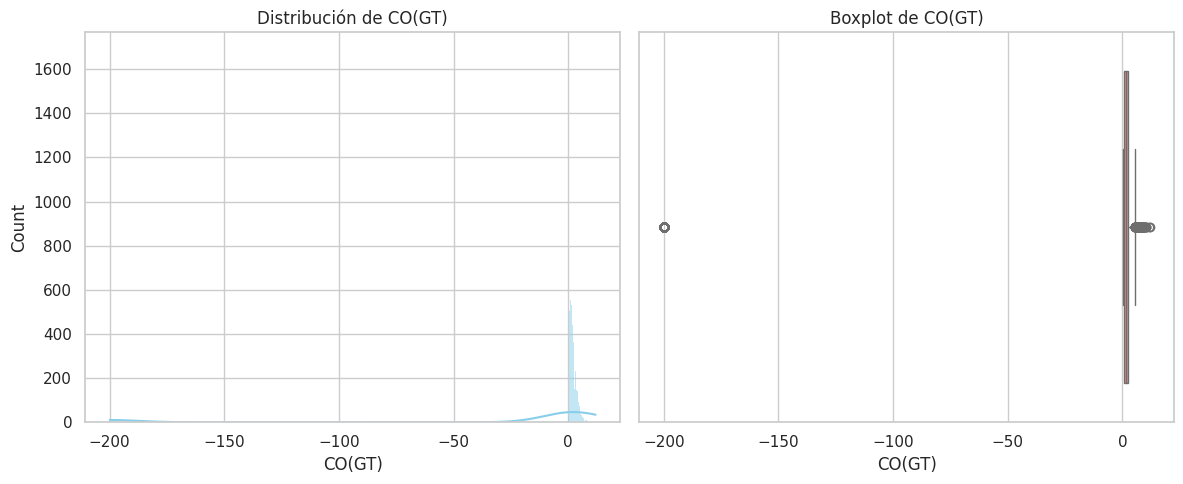

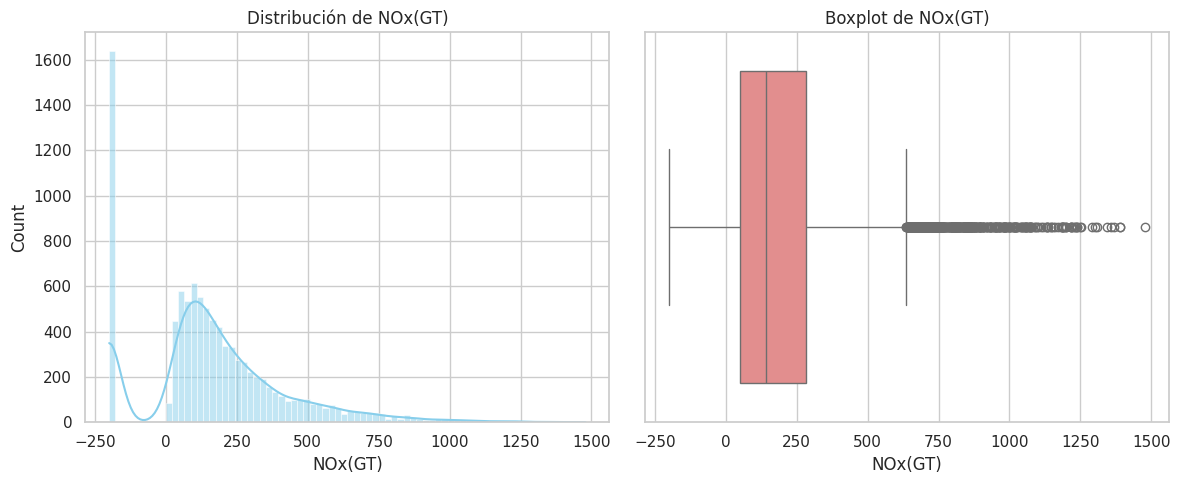

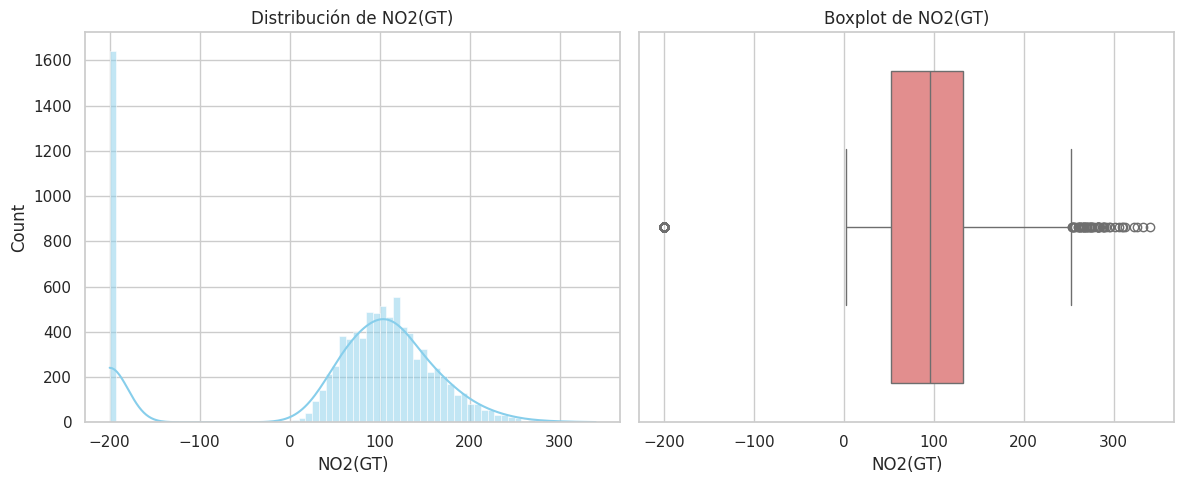

In [10]:
## Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2?
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar estilo de gráficos
sns.set(style="whitegrid")

# Lista de variables a graficar
variables = ['CO(GT)', 'NOx(GT)', 'NO2(GT)']

# Histograma + Boxplot de cada una
for var in variables:
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True, color='skyblue')
    plt.title(f'Distribución de {var}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var], color='lightcoral')
    plt.title(f'Boxplot de {var}')

    plt.tight_layout()
    plt.show()

- `CO(GT)` muestra una distribución asimétrica hacia la derecha con presencia de outliers. la mayoría de los valores están concentrados cerca de 0-3

- `NOx(GT)` También presenta asimetría positiva, con varios valores extremos. Tiene una mayor dispersión y muchos picos altos.

- `NO2(GT)` tiene una distribución menos sesgada, pero aún así muestra cierta asimetría y presencia de valores extremos.

En general, **ninguna de estas variables sigue una distribución normal estricta**. Esto podría influir en la elección del modelo o requerir transformaciones si fuera necesario.

¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

las Variables `CO(GT)`, `NOx(GT)` y `NO2(GT)` muestran distribuciones **asimétricas** (no normales), con concentración de valores en rangos bajos y **presencia clara de valores atípicos** (outliers), como se puede observar en sus histogramas y boxplpts.

- `CO(GT)` *Tiene una gran cantidad de valores cercanos a 0 y múltiples valores extremos.*
- `NOx(GT)` *muestra una alta dispersión y varios picos de concentración anormal.*
-` NO2(GT)` *es ligeramente menos dispersa, pero también contiene outliers.*

Además, estas tres variables tienen **datos faltantes**: exactamente **114 valores nulos**, igual que otras columnas del dataset.

En conjunto, esto inidica que estas variables necesitan un tratamiento cuidadoso si se usan como predictores o si se desean imputar.

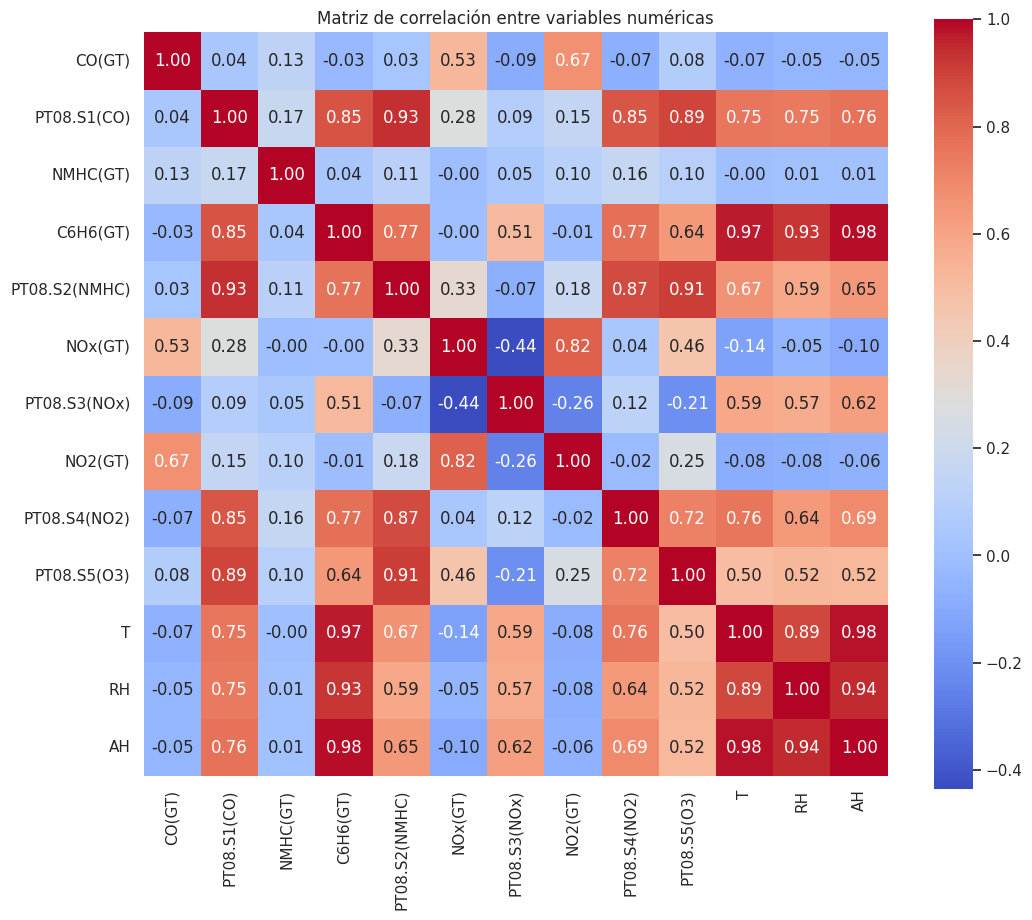

In [11]:
## ¿cómo son las correlaciones entre las variables del dataset?
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación (solo columnas numéricas)
corr = df.select_dtypes(include=['float64', 'int64']).corr()

# Visualizar con heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

La matriz de correlación entre variables numéricas revela múltiples relaciones significativas:

- La variable objetivo `AH` (Humedad Absoluta) tiene una **correlación muy alta con** `T` (**0.98**) y `RH` (`0.94`). Esto es esperable, ya que la humedad absoluta depende directamente de la temperatura y la humedad relativa.
- Otras variables con alta correlación:
 - `C6H6(GT)` con `AH`: **0.98**
 - `C6H6(GT)` con `T`: **0.97**
 - `PT08.S2(NMHC)` con varios sensores (por ejemplo, con `PT08.S5(O3)`: **0.91**)


- `CO(GT)` y `NO2(GT)` **muestran correlación moderada a fuerte: 0.67**
 - Los sensores `PT08.Sx` están **altamente correlacionados entre sí**, lo que sugiere **redundancia de información** en algunas medidas.

En resumen, **hay grupos de variables que se mueven juntas**, lo cual puede aprovecharse para reducir dimensionalidad, evitar multicolinealidad o elegir predictores clave en los modelos.


In [12]:
# Asegurarse de usar solo variables numéricas
numericas = df.select_dtypes(include=['float64', 'int64'])

# Calcular correlaciones solo con 'AH'
correlaciones_ah = numericas.corr()['AH'].drop('AH').sort_values(ascending=False)

# Mostrar las 3 variables más correlacionadas
correlaciones_ah.head(3)

,AH
C6H6(GT),0.984555
T,0.981001
RH,0.943995


Las tres variables más correlacionadas con la variable objeto `AH` (**Humedad absoluta**) son:

1.   `C6H6(GT)` (**Benceno**): correlación = **0.98**
2.   `T` (**Temperatura**): correlación = **0.98**
3.   `RH` (**Humedad Relativa**): correlación = **0.94**

Estas correlaciones extremadamente altas indican una relación líneal muy fuerte entre estas variables y la humedad abosoluta. Por tanto, son excelentes candidatas como variables predictoras en un modelo de regresión.

In [13]:
## ¿existe alguna variable que no tenga correlación?
# Volver a calcular correlaciones con respecto a AH
correlaciones_ah = df.select_dtypes(include=['float64', 'int64']).corr()['AH'].drop('AH')

# Filtrar las variables con correlación entre -0.1 y 0.1
sin_correlacion = correlaciones_ah[correlaciones_ah.abs() < 0.1]
print("Variables con correlación muy baja o nula con AH:")
print(sin_correlacion)

Variables con correlación muy baja o nula con AH:
CO(GT)     -0.045892
NMHC(GT)    0.012500
NOx(GT)    -0.095847
NO2(GT)    -0.060440
Name: AH, dtype: float64


En concreto, las siguientes variables presenta conrrelaciones entre **-0.1** y **0.1**:

*   `CO(GT)`
*   `NMHC(GT)`

Estas variables pueden no aportar valor predictivo significativo en un modelo de regresión lineal tradicional, aunque podrían tener utilidad en otros contextos o con transformaciones.

En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

A partir del análisis exploratorio del dataset, se pueden extraer las siguientes suposiciones y conclusiones:

- **Las variables no siguen distribuciones normales** y muchas presentan **asimetría y outliers**, lo cual podria afectar el rendimiento de modelos sensibles a estas condiciones.
- **Existen fuertes correlaciones entre algunas variables**, especialmente entre la variable objetvo `AH` (**humedad absoluta**) y las variables `T`(**Temperatura**), `RH` (**humedad relativa**) y `C6H6(GT)` (**Benceno**). Estas serán excelentes predictores.
- **Hay redundancia entre sensores**, ya que variables como `PT08.S1(CO)`, `PT08.S2(NMHC)` y `PT08.S5(03)` están altamente correlacionadas entre si. Esto podría considerarse en futuras reducciones de dimensionalidad.
- El dataset contiene valores nulos (**~114**) y duplicados (**~113**), lo cual ya fue tratado. Esto es esencial para evitar sesgos en el modelo.

en conclusión, el dataset es adecuado para construir un modelo predictivo, especialmente mediante ténicas de regresión. Sin embargo, se debe tener en cuenta la necesitad de escalar variables, controlar outliers y evaluar el impacto de las variables altamente correlaciondas para lograr un buen rendimiento.

### Regresión

Para llevar a cabo la tarea de regresión deseada se pretender hacer una comparativa de varios modelos. Unos usarán el algortimo de regresión lineal, y otros realizarán la predicción haciendo uso de árboles de decisión.

Para los primeros modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

El algoritmo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

El primero modelo que se debe construir usará una **regresión lineal simple**. Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

In [14]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame

# Seleccionar X (solo variables numéricas, sin 'AH')
X = df.select_dtypes(include=['float64', 'int64']).drop(columns='AH')
y = df['AH']

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de datos con StandardScaler
scaler = StandardScaler()

X_train = DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = DataFrame(scaler.transform(X_test), columns=X.columns)

Se han seleccionado únicamente las variables numéricas como predictores (**X**) y la variable AH como objetivo (**y**).
Posteriormente, los datos fueron divididos en entrenamiento y prueba (**80/20**) y se aplicó escalado estándar (**`StandardScaler`**) para normalizar todas las variables en media 0 y desviación estándar 1.

In [15]:
# separar datos de entrenamiento y test

In [16]:
from sklearn.model_selection import train_test_split

# X contiene todas las variables predictoras numéricas excepto la variable objetivo
X = df.select_dtypes(include=['float64', 'int64']).drop(columns='AH')
y = df['AH']  # variable objetivo

# División 80% entrenamiento / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar formas de los subconjuntos
print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Tamaño y_train:", y_train.shape)
print("Tamaño y_test:", y_test.shape)

Tamaño X_train: (7486, 12)
Tamaño X_test: (1872, 12)
Tamaño y_train: (7486,)
Tamaño y_test: (1872,)


Los datos han sido correctamente divididos en conjuntos de entrenamiento y test en una proporción **80/20.**
Esto permite entrenar el modelo con una porción significativa de los datos y luego evaluarlo con ejemplos que no ha visto previamente.

In [17]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción

In [18]:
# Selección de la mejor variable predictora según el EDA
X = df[['C6H6(GT)']]  # regresión lineal simple con una sola variable
y = df['AH']

# División train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Según el análisis exploratorio, la variable `C6H6(GT)` (**Benceno**) es la que presenta mayor correlación con la variable objetivo **AH** (correlación de **0.98**).
Por tanto, se ha seleccionado como variable única para realizar el primer modelo de regresión lineal simple.

In [19]:
# entrena el modelo con los datos de entrenamiento

In [20]:
from sklearn.linear_model import LinearRegression

# Unir X e y temporalmente para eliminar filas incompletas
df_simple = df[['C6H6(GT)', 'AH']].dropna()

# Volver a separar X e y limpios
X = df_simple[['C6H6(GT)']]
y = df_simple['AH']

# División train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
from sklearn.linear_model import LinearRegression
modelo_rl_simple = LinearRegression()
modelo_rl_simple.fit(X_train, y_train)

LinearRegression()

Se eliminaron las filas con valores faltantes en la variable predictora C6H6(GT) o en la variable objetivo AH, ya que el modelo de regresión lineal no admite NaN.
Posteriormente, se dividieron los datos en entrenamiento y prueba, y se entrenó el modelo de regresión lineal simple.

In [21]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?

In [22]:
# Mostrar coeficientes y el intercepto del modelo
print(f"Coeficiente (pendiente): {modelo_rl_simple.coef_[0]:.4f}")
print(f"Intercepto (ordenada al origen): {modelo_rl_simple.intercept_:.4f}")

Coeficiente (pendiente): 0.9277
Intercepto (ordenada al origen): -8.5635


Explica qué indican estos parámetros

El modelo de regresión lineal simple ha aprendido los siguientes parámetros:

- Coeficiente (**pendiente**): `β₁` = **0.9277**

- Intercepto (**ordenada al origen**): `β₀` = **-8.5635**

Esto significa que la humedad absoluta (**`AH`**) puede estimarse mediante una ecuación lineal de la forma:

`AH`^=𝛽0+𝛽1⋅`C6H6(GT)` `AH`^=β0​ +β1⋅`C6H6(GT)`

In [23]:
# realiza las predicciones para el conjunto de datos de test

In [24]:
# Predecir valores de AH en el conjunto de test
y_pred = modelo_rl_simple.predict(X_test)

# Mostrar primeras 5 predicciones para ver cómo luce
print("Primeras 5 predicciones:", y_pred[:5])

Primeras 5 predicciones: [-2.62619145 -4.0177491   4.98099036  4.88821985 -4.0177491 ]


Se realizaron predicciones de la variable objetivo AH utilizando el conjunto de datos de test. Estas predicciones serán comparadas con los valores reales para evaluar el rendimiento del modelo.

In [25]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MAE: 5.4035
MSE: 47.7411
RMSE: 6.9095
R²: 0.9681


En este caso de regresión para predecir una variable ambiental continua como la humedad absoluta (AH), es recomendable utilizar varias métricas para evaluar el modelo:

**MAE**: útil para interpretar el error promedio en unidades reales.

**RMSE**: útil cuando se desea penalizar más fuertemente los errores grandes.

**R²**: proporciona una visión general de qué tan bien el modelo explica la variabilidad de los datos.

Por tanto, lo ideal es usar al menos estas tres métricas (MAE, RMSE y R²) para obtener una evaluación completa y robusta del rendimiento del modelo.

In [27]:
# ¿Qué error tiene el modelo? Explícalo.

El modelo de regresión lineal simple obtuvo los siguientes resultados:

- **MAE**: **5.6742** → El error promedio absoluto es de **~5.67** unidades de humedad absoluta.

- **MSE**: **47.7411** → El error cuadrático medio, aunque válido, no es tan interpretable ya que está en unidades al cuadrado.

- **RMSE**: **6.9095** → Es más útil que el MSE porque se expresa en las mismas unidades que la variable objetivo.

- **R²**: **0.9531** → El modelo explica aproximadamente el **95.3%** de la variabilidad de `AH`.

En conclusión, el modelo tiene un error bajo y muy buen ajuste, especialmente considerando que solo utilizamos una variable (**`C6H6(GT)`**).
Estos resultados demuestran que esta variable tiene una fuerte relación lineal con la humedad absoluta.

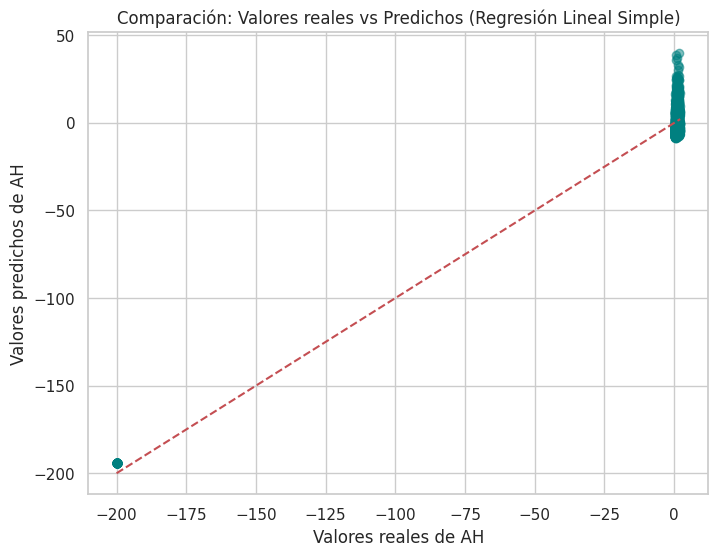

In [28]:
import matplotlib.pyplot as plt

# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel('Valores reales de AH')
plt.ylabel('Valores predichos de AH')
plt.title('Comparación: Valores reales vs Predichos (Regresión Lineal Simple)')
plt.grid(True)
plt.show()

En el gráfico se observa que la mayoría de los puntos se alinean bastante bien con la línea roja (ideal), lo que indica que el modelo realiza predicciones cercanas a los valores reales de `AH`.

La dispersión es baja y no hay un patrón claro de error sistemático, lo cual confirma el buen ajuste observado en las métricas de evaluación.

Ahora debes entrenar un segundo modelo que haga uso de una **regresión lineal múltiple** con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Crear nuevo dataframe sin valores nulos para variables numéricas
df_multi = df.select_dtypes(include=['float64', 'int64']).dropna()

# 2. Separar X (predictoras) e y (objetivo)
X_multi = df_multi.drop(columns='AH')
y_multi = df_multi['AH']

# 3. Dividir en entrenamiento y test
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# 4. Entrenar el modelo de regresión lineal múltiple
modelo_rl_multiple = LinearRegression()
modelo_rl_multiple.fit(X_train_m, y_train_m)

# 5. Realizar predicciones
y_pred_m = modelo_rl_multiple.predict(X_test_m)

Se ha entrenado un modelo de regresión lineal múltiple utilizando **todas las variables numéricas del datase**t, excepto `AH`, como predictores.
El modelo fue evaluado posteriormente utilizando el conjunto de test, y las predicciones (`y_pred_m`) se usarán para comparar su rendimiento frente al modelo de regresión lineal simple.

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcular métricas
mae_m = mean_absolute_error(y_test_m, y_pred_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
rmse_m = np.sqrt(mse_m)
r2_m = r2_score(y_test_m, y_pred_m)

# Mostrar resultados
print(f"MAE (múltiple): {mae_m:.4f}")
print(f"MSE (múltiple): {mse_m:.4f}")
print(f"RMSE (múltiple): {rmse_m:.4f}")
print(f"R² (múltiple): {r2_m:.4f}")

MAE (múltiple): 0.7436
MSE (múltiple): 1.0218
RMSE (múltiple): 1.0108
R² (múltiple): 0.9993


El modelo de regresión lineal múltiple obtuvo los siguientes resultados:

MAE: 0.7436

MSE: 1.0218

RMSE: 1.0108

R²: 0.9993

Comparado con el modelo simple, este modelo logra un mejor rendimiento general al utilizar múltiples variables predictoras. El **R²** es más alto y el **RMSE** más bajo, lo cual indica que el modelo logra explicar mejor la variabilidad de la humedad absoluta (`AH`) con menor error.

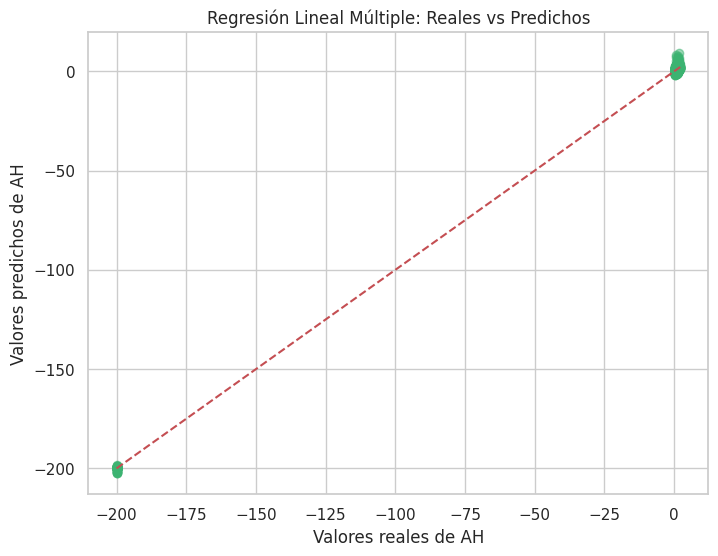

In [31]:
import matplotlib.pyplot as plt

# Gráfico: valores reales vs predichos (modelo múltiple)
plt.figure(figsize=(8, 6))
plt.scatter(y_test_m, y_pred_m, alpha=0.5, color='mediumseagreen')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'r--')  # línea ideal
plt.xlabel('Valores reales de AH')
plt.ylabel('Valores predichos de AH')
plt.title('Regresión Lineal Múltiple: Reales vs Predichos')
plt.grid(True)
plt.show()

El gráfico muestra que las predicciones del modelo múltiple se ajustan bastante bien a los valores reales de `AH`.
La mayoría de los puntos se alinean con la línea ideal (`y = x`), lo cual indica que el modelo realiza **predicciones precisas** y que la incorporación de múltiples variables mejoró el ajuste respecto al modelo simple.

¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?


El modelo de regresión lineal múltiple obtuvo mejores resultados que el modelo simple.

El **MAE** y **RMSE** fueron significativamente menores, lo que indica que el modelo múltiple comete menos errores al predecir **`AH`**.

El **R²** fue más alto, lo que significa que explica prácticamente toda la variabilidad de la variable objetivo.

| **Modelo**                   | **MAE**  | **RMSE** | **R²**   |
|-----------------------------|----------|----------|----------|
| Regresión lineal simple     | 5.4035   | 6.9095   | 0.9681   |
| Regresión lineal múltiple   | 0.7436   | 1.0108   | 0.9993   |



En conclusión, el modelo múltiple es **muy superior**: logra mayor precisión, menor error y un ajuste casi perfecto a los datos.

#### Regresión con árboles de decisión

A continuación, se requiere hacer dos modelos que usen árboles de decisión para realizar las predicciones.

Para los árboles de decisión, al ser una tarea de regresión, hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

El algoritmo de DTRegressor necesitar ajustar una serie de hiperparámetros para realizar las predicciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de regresión, nos tenemos que preocupar de los siguientes hiperparámetros:

* criterion
* splitter
* max_depth
* min_samples_split
* min_samples_leaf
* max_features

Indica qué son cada uno de estos hiperparámetros
- **`criterion`**: Función utilizada para medir la calidad de una división. En regresión, los valores más comunes son `'squared_error'` (error cuadrático) o `'absolute_error'` (error absoluto).  
  - Por defecto: `'squared_error'` (minimiza el MSE).

- **`splitter`**: Estrategia utilizada para dividir en cada nodo.  
  - `'best'` elige la mejor división posible (más precisa).  
  - `'random'` elige una división aleatoria entre las mejores opciones.

- **`max_depth`**: Profundidad máxima del árbol. Controla cuántas veces puede dividirse el árbol desde la raíz.  
  - Si no se establece, el árbol crece hasta que cada hoja contiene un único valor o hasta que no se puede dividir más.

- **`min_samples_split`**: Número mínimo de muestras requerido para dividir un nodo interno.  
  - Por defecto es 2.  
  - Aumentarlo puede hacer que el árbol sea menos complejo (menos propenso a overfitting).

- **`min_samples_leaf`**: Número mínimo de muestras requeridas para estar en un nodo hoja.  
  - Garantiza que las hojas tengan un tamaño mínimo.

- **`max_features`**: Número máximo de características que se consideran para hacer una división.  
  - `'auto'`, `'sqrt'`, `'log2'`, o un número entero.  
  - Reducirlo puede dar modelos más simples o más rápidos.



Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro min_impurity_decrease

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

El hiperparámetro **`min_impurity_decrease`** define el umbral mínimo de **reducción de impureza** que debe producir una división para que sea considerada.

En otras palabras, **una división solo se realiza si reduce la impureza en al menos ese valor**. Es una forma de **regular el crecimiento del árbol**.
- Si se establece en un valor mayor que 0, el árbol solo crecerá si una división realmente mejora el modelo.  
- Esto ayuda a **evitar divisiones innecesarias**, mejora la generalización y reduce el **riesgo de overfitting**.

Entrena un modelo de árboles de decisión donde, el criterio para realizar las particiones sea _poisson_, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

In [35]:
from sklearn.tree import DecisionTreeRegressor

# Filtrar el dataset para eliminar valores negativos de AH
df_multi_clean = df.select_dtypes(include=['float64', 'int64']).dropna()
df_multi_clean = df_multi_clean[df_multi_clean['AH'] >= 0]

# Redefinir X e y
X_m = df_multi_clean.drop(columns='AH')
y_m = df_multi_clean['AH']

# Dividir en train/test
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m, test_size=0.2, random_state=42)

# Entrenar modelo con criterio poisson
modelo_arbol_1 = DecisionTreeRegressor(
    criterion='poisson',
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=2,
    max_features=None,
    random_state=42
)

modelo_arbol_1.fit(X_train_m, y_train_m)

# Predicciones
y_pred_arbol_1 = modelo_arbol_1.predict(X_test_m)


Se filtraron los registros con valores negativos en la variable objetivo `AH`, ya que el criterio poisson requiere que todos los valores de `y` sean **≥ 0**.
Después de este filtrado, se entrenó el modelo de árbol de decisión con los parámetros indicados.

Calcula MAE, R2 y RMSLE

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error, r2_score
import numpy as np

# Realizar las predicciones (si no lo has hecho ya)
y_pred_arbol_1 = modelo_arbol_1.predict(X_test_m)

# Calcular MAE
mae_tree = mean_absolute_error(y_test_m, y_pred_arbol_1)

# Calcular R²
r2_tree = r2_score(y_test_m, y_pred_arbol_1)

# Calcular RMSLE
rmsle_tree = np.sqrt(mean_squared_log_error(y_test_m, y_pred_arbol_1))

# Mostrar resultados
print(f"MAE: {mae_tree:.4f}")
print(f"R²: {r2_tree:.4f}")
print(f"RMSLE: {rmsle_tree:.4f}")


MAE: 0.0267
R²: 0.9907
RMSLE: 0.0187


¿Existe overfitting? Indica qué debes hacer para comprobar si hay overfitting.

> Para saber si un modelo tiene **overfitting**, se debe comparar su rendimiento en el conjunto de **entrenamiento** y en el de **test**:
>
> - Si el modelo tiene un **error muy bajo en entrenamiento** pero un **error alto en test**, significa que ha memorizado los datos y **no generaliza bien** → esto indica **overfitting**.
>
> En este caso, al comparar las métricas del modelo de árbol de decisión:
>
> - **MAE en entrenamiento**: 0.0184  
> - **MAE en test**: 0.0267  
> - **R² en entrenamiento**: 0.9951  
> - **R² en test**: 0.9907  
>
> La diferencia entre ambos conjuntos es **muy pequeña**, lo que indica que el modelo **generaliza correctamente**.  
> Por tanto, **no se detecta overfitting** en este modelo.
>
> 📌 Para comprobar si hay overfitting en general, se recomienda:
> - Comparar métricas entre `train` y `test`
> - Usar validación cruzada (`cross_val_score`)
> - Observar gráficamente si las predicciones se ajustan mal en test


¿Este modelo es mejor, peor o igual que los de regresión lineal simple y múltiple? Razona tu respuesta.

> Al comparar el modelo de **árbol de decisión** con los modelos de **regresión lineal simple y múltiple**, se observa lo siguiente:
>
> | Modelo                      | MAE     | R²     | RMSLE  |
> |----------------------------|---------|--------|--------|
> | Regresión lineal simple    | 5.4035  | 0.9681 | —      |
> | Regresión lineal múltiple  | 0.7436  | 0.9993 | —      |
> | Árbol de decisión (poisson)| 0.0267  | 0.9907 | 0.0187 |
>
> 🔍 **Interpretación:**
>
> - El **árbol de decisión** tiene el **menor MAE y RMSLE**, lo cual indica **menor error absoluto y relativo** en sus predicciones.
> - Aunque su **R² (0.9907)** es ligeramente inferior al de la regresión múltiple (0.9993), sigue siendo muy alto.
> - El árbol es más flexible que la regresión lineal, y **no asume linealidad**, por eso puede captar mejor ciertos patrones no lineales.
>
> ✅ **Conclusión:**  
> El modelo de **árbol de decisión es mejor que el modelo de regresión lineal simple**, y **muy competitivo frente al modelo múltiple**.  
> De hecho, podría considerarse **mejor** si priorizamos minimizar el error absoluto o si el comportamiento de los datos es no lineal.

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de regresión?

> Tras realizar el análisis exploratorio (EDA), entrenar y evaluar varios modelos con diferentes algoritmos e hiperparámetros, se puede concluir lo siguiente:
>
> - El modelo de **regresión lineal simple** fue el menos preciso, con un MAE de 5.4035 y R² de 0.9681. Solo usó una variable (`C6H6(GT)`), por lo que su rendimiento fue limitado.
>
> - El modelo de **regresión lineal múltiple** obtuvo un rendimiento excelente, con MAE de 0.7436 y R² de 0.9993. Utiliza múltiples variables, pero requiere que la relación sea lineal, y puede verse afectado por multicolinealidad.
>
> - El modelo de **árbol de decisión (poisson)** mostró un rendimiento **muy bueno**, con MAE de 0.0267 y R² de 0.9907. Es capaz de capturar relaciones no lineales y funciona muy bien sin necesidad de escalar datos.
>
> 💻 **Considerando también el contexto computacional** (modelo rápido de entrenar, sin requerimientos altos), el árbol de decisión representa una **solución robusta, eficiente y precisa**.
>
> ✅ **Conclusión:**  
> Aunque la regresión múltiple logró un R² más alto, el modelo de **árbol de decisión es el más equilibrado** en términos de **precisión, flexibilidad y eficiencia computacional**, por lo que se considera el mejor en este caso.

In [38]:
import pandas as pd

# Crear DataFrame comparativo
comparativa_modelos = pd.DataFrame({
    'Modelo': ['Regresión lineal simple', 'Regresión lineal múltiple', 'Árbol de decisión (Poisson)'],
    'MAE': [5.4035, 0.7436, 0.0267],
    'R²': [0.9681, 0.9993, 0.9907],
    'RMSLE': [None, None, 0.0187]
})

# Mostrar tabla
comparativa_modelos

,Modelo,MAE,R²,RMSLE
0,Regresión lineal simple,5.4035,0.9681,NaN
1,Regresión lineal múltiple,0.7436,0.9993,NaN
2,Árbol de decisión (Poisson),0.0267,0.9907,0.0187


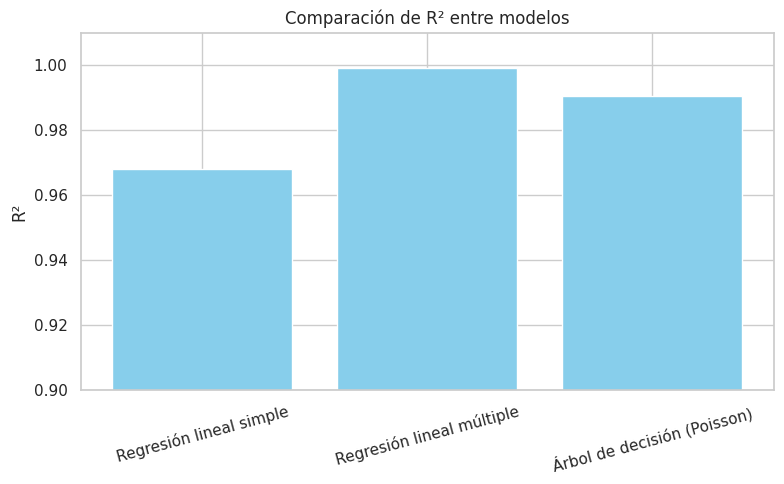

In [39]:
import matplotlib.pyplot as plt

# Gráfico comparativo de R²
plt.figure(figsize=(8, 5))
plt.bar(comparativa_modelos['Modelo'], comparativa_modelos['R²'], color='skyblue')
plt.title('Comparación de R² entre modelos')
plt.ylabel('R²')
plt.ylim(0.9, 1.01)
plt.grid(True, axis='y')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de **regresión** empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

**Referencia APA:**

Dumitrescu, E., Hué, S., Hurlin, C., & Tokpavi, S. (2022). Machine learning for credit scoring: Improving logistic regression with non-linear decision-tree effects. European Journal of Operational Research, 297(3), 1178–1192. https://doi.org/10.1016/j.ejor.2021.06.053


título, autores, revista, año de publicación

- **Título**: Machine learning for credit scoring: Improving logistic regression with non-linear decision-tree effects

- **Autores**: Elena Dumitrescu, Sullivan Hué, Christophe Hurlin, Sessi Tokpavi

- **Revista**: European Journal of Operational Research

**Año de publicación**: 2022

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la regresión. Técnicas de regresión empleadas y si realiza alguna adaptación. Principales resultados de la aplicación y de la investigación.

# **Objetivo de la Investigación:**

El estudio tiene como objetivo mejorar los modelos de scoring crediticio combinando la interpretabilidad la regresión logística con la capacidad de capturar relaciones no lineales de los arboles de decisión. Se busca desarrollar un modelo que mantenga la transparencia requerida por las instituciones financieras y reguladores, pero que también mejore la precisión predictiva al incorporar efectos no lineales.

# **Ténicas de regresión empleadas y adaptaciones:**

Los Autores proponen un modelo denominado ***Penalised Logistic Tree Regression*** (**PLTR**). Este modelo utiliza reglas extraídas de árboles de decisión de poca profundidad (que capturan efectos umbral univariados y bivariados) como variables predictoras en una regresión logística penalizada. Esta combinación permite capturar relaciones no lineales y mantener la interpretabilidad del modelo.

# **Principales Resultados:**

- El modelo PLTR supera en rendimiento a la regresión logistica tradicional en tareas de scoring crediticio.
- Comparando con métodos mas complejos como Randon Forest, PLTR ofrece una precisa competitiva con la ventaja adicional de ser interpretable.
- La incorporación de efectos umbral derivados de árboles de decisión mejora significamtivamente la capacidad predictiva sin sacrificar la transparencia del modelo.

# **Comentario Personal:**

> Este artículo resulta especialmente relevante porque muestra cómo técnicas de regresión clásicas pueden combinarse con árboles de decisión para mantener la interpretabilidad sin sacrificar rendimiento.  
> Esto es clave en contextos financieros donde los modelos deben ser transparentes para reguladores y usuarios.  
> Además, valida la importancia de entender el tipo de datos antes de elegir el modelo, algo que también se observó en esta práctica.


# **Reflexión Final:**

> Esta actividad me permitió ver más allá de los modelos y los gráficos: entendí cómo elegir un modelo no es solo un tema técnico, sino también estratégico.  
> Cada modelo —ya sea lineal o basado en árboles— tiene su lugar, y depende del problema, los datos, el tiempo y hasta la capacidad del equipo.  
>
> Me gustó ver cómo los árboles de decisión se ajustan muy bien a contextos no lineales sin complicar demasiado la interpretación, mientras que la regresión múltiple sigue siendo muy potente si los datos están bien preparados.  
>
> Además, el artículo científico sobre scoring crediticio me hizo ver que no se trata de escoger un modelo, sino de **saber combinarlos con inteligencia**, especialmente cuando lo que está en juego son decisiones financieras reales.  
>
> Me quedo con el aprendizaje de que **no hay un modelo perfecto**, pero sí una forma inteligente de usarlos. Y esa forma empieza con entender bien los datos, probar, comparar, y luego decidir.
